In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
filepath = "../../History/processed/"
soldStatus = ['Sold','06 - Closed - Sold/Fermer - Vendu']
lostStatus = ['Lost', '08 - Closed - Abandoned/Fermer - Abandonné', '07 - Closed - Lost/Fermer - Perdu']
closedStatus = soldStatus + lostStatus

In [21]:
db={}
for i in range(1,11):   
    file = "FY18-P"+str(i)
    data = pd.read_excel(filepath+file+".xlsx")
    # Cleaning data
    data = data[[ 
            "Id#",
            'Close Period', 
            'Sales Stage',
            'Market Offering Solution', 
            ]]
    data = data[data['Market Offering Solution'] == "Technology"]
    data.drop(['Market Offering Solution'], axis=1, inplace = True)
    db[i]= data

In [262]:
# adds a closedOn filed to the db array, which holds all the files

for x in range(1,11):
    currentClosed = db[1][(db[1]['Sales Stage'].isin(closedStatus)) & ~(db[1]['Close Period'] == "2018 - 01")]
    closed = currentClosed['Id#']
    for i in range(1, 11):
        newindex = i
        previousClosed = closed
        closed = db[newindex][(db[newindex]['Sales Stage'].isin(closedStatus))]['Id#']
        newClosed = closed[~closed.isin(previousClosed)]
        db[x].loc[db[x]['Id#'].isin(newClosed),'closedOn']=i


In [249]:
db[1].head()


,Id#,Close Period,Sales Stage,closedOn
0,1-21WS49,2018 - 04,00 - Identifying,4.0
1,1-7FPYN6,2018 - 05,00 - Identifying,5.0
2,1-9LNDDW,2018 - 08,00 - Identifying,NaN
3,1-HYRBTG,2020 - 03,00 - Identifying,NaN
4,1-HRF2WN,2018 - 13,00 - Identifying,7.0


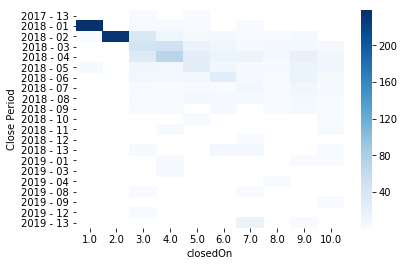

In [264]:
# heatmap for close period vs closedOn
da = db[2]
do = pd.pivot_table(da, values="Id#",index=["Close Period"], columns=["closedOn"], aggfunc="count")
fig = sns.heatmap(do, cmap="Blues")

In [273]:
db[1][db[1]['Close Period'] == "2018 - 02"].groupby("Sales Stage").count()

,Id#,Close Period,closedOn
Sales Stage,,,
00 - Identifying,13,13,12
01 - Contacting,13,13,11
02 - Qualifying,84,84,81
03 - Developing,22,22,20
04 - Proposed,23,23,20
05 - Verbal - Commit,10,10,10


In [297]:
i = 5
db[i]['periodDif']=pd.to_numeric(db[i]['Close Period'].str.split("-").str[1]) - i
db[i]['closedDif']=db[i]['closedOn']-i

In [301]:
db[i][db[i]['Sales Stage']=='05 - Verbal - Commit']

,Id#,Close Period,Sales Stage,closedOn,periodDif,closedDif
1434,1-ZPOPKR,2018 - 07,05 - Verbal - Commit,6.0,2,1.0
1436,1-ZQ20DV,2018 - 06,05 - Verbal - Commit,6.0,1,1.0
1437,1-ZOC5CN,2018 - 07,05 - Verbal - Commit,6.0,2,1.0
1438,1-ZOSVJT,2018 - 07,05 - Verbal - Commit,6.0,2,1.0
1439,1-ZNJA09,2018 - 07,05 - Verbal - Commit,6.0,2,1.0
1441,1-ZM4INT,2018 - 07,05 - Verbal - Commit,6.0,2,1.0
1443,1-ZLDW9G,2018 - 07,05 - Verbal - Commit,6.0,2,1.0
1444,1-ZK6ZO7,2018 - 06,05 - Verbal - Commit,6.0,1,1.0
1445,1-ZK6ZVJ,2018 - 07,05 - Verbal - Commit,8.0,2,3.0
1448,1-ZJ361R,2018 - 06,05 - Verbal - Commit,6.0,1,1.0


In [ ]:
# Generate heatmap graphs for each file, close Period vs closeOn
for i in range(1,11):
    plt.clf()
    plt.figure(figsize=(10,6))
    da = db[i]
    do = pd.pivot_table(da, values="Id#",index=["Close Period"], columns=["closedOn"], aggfunc="count")
    fig = sns.heatmap(do, cmap="Blues")
    plt.savefig("pics/"+str(i)+'.png')

In [ ]:
# checking why nulls happen
nulls = db[1][db[1]['closedOn'].isnull()]['Id#']
fedup = db[8][(db[8]['Id#'].isin(nulls))&(db[8]['Sales Stage'].isin(closedStatus))]
shits = fedup[fedup['Close Period'] != '2018 - 01']['Id#']

# checking closed status at a certain period
ido = db[1][db[1]['closedOn']==1]['Id#']
db[2][db[2]['Id#'].isin(ido)]